**Proyecto realizado con mis compañeros Maida Marco y Berenice Paula durante el curso de Ciencia de Datos APV y UTN FRA**

Realizamos unos modelos de entrenamiento sobre un dataset del titanic para tratar de averiguar cuan efectivo es nuestro modelo, si quisiesemos conocer la probabilidad de supervivencia de los pasajeros en un dataset de entrenamiento.

**1. ¿Qué pasa si usamos el conjunto de prueba en alguno de los pasos previos al de prueba?**

Habra datos incompletos, faltantes, etc y no podremos realizar una predicción acertada.

In [1]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Cargar dataset y visualizar
filename = 'train.csv'
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2.1 ¿Qué información podemos concluir aplicando el método _describe_?**

La columna "Age" no tienen todos los datos que debería tener.
Que hay 891 pasajeros. En promedio son más las personas que murieron que las que sobrevivieron. La mayoría de las personas viajaban en 2da o 3era clase. 

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2.2 ¿Cuantos datos hay en cada clase de la variable _Pclass_?**

3    491
1    216
2    184
Name: Pclass, dtype: int64


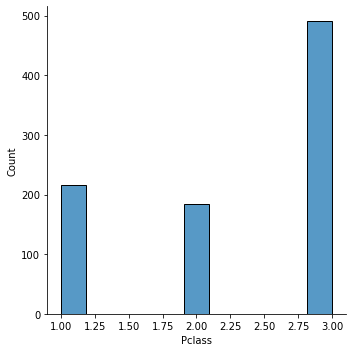

In [4]:
print(train.Pclass.value_counts())
sns.displot(data = train, x = "Pclass")

**2.3 ¿Con que variables esta más relacionada la variable _Survived_? ¿Tiene sentido esas relaciones?**

In [5]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Con la variable Fare y la variable Pclass. Podemos deducir que las personas que pagaron más y por tanto pertenerecieron a una clase superior tuvieron mayor tendencia a sobrevivir.

**2.4 Busqueda datos nulos.**

Esto permite conocer si tenemos datos nulos

In [6]:
train["Age"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

Esto permite cuantos nulos hay

In [7]:
train["Age"].isna().sum()

177

Esto nos muestra los nulos


In [8]:
nulos = train["Age"].isna()
train[nulos]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Describimos "nulos"

In [9]:
train[nulos].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


**3. ¿Qué variables del conjunto de datos original seleccionara para usar? Explique los motivos.**

Utilizaremos "Age", "Sex", "Pclass", "Fare" y "Survived" (utilizada para limpieza y graficos respectivamente).  Consideramos que son las variables que tienen mas correlación, además en una situación de emergencia siempre se da prioridad a "Mujeres y niños" y porque los que pagaban más, oseá era de una clase superior, estaban mas cerca de los botes salvavidas.

In [10]:
trainNuevo = train.drop(columns = ["PassengerId","SibSp","Parch","Ticket","Cabin","Embarked","Name"])

**4. Realice la limpieza de los datos**

**4.1 ¿Qué variables tienen datos nulos? ¿Tiene sentido que esas variables tengan datos nulos?**

In [11]:
trainNuevo.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

Hay 177 datos nulos en la variable Age.

**4.2 Proponga y ejecute una idea para imputar los datos nulos.**

Encontramos el rango que abarca la mayor cantidad de datos reales. Luego asignamos a los nulos un valor aleatorio dentro de ese rango.

In [12]:
import random

#función que retoma si un valor es nulo o no
def isNaN(num):
    return num!= num

# Buscamos el 95% de los datos de edad
mediana = trainNuevo["Age"].median()
iqr = trainNuevo["Age"].quantile(.75) - trainNuevo["Age"].quantile(.25)
rango = [mediana - 1.5*iqr, mediana + 1.5*iqr]
mascara = (trainNuevo["Age"] < rango[1]) & (trainNuevo["Age"] > rango[0])

train_con_mascara = trainNuevo[mascara]["Age"].tolist()

#Buscar los indices de los nulos
for i in range(len(trainNuevo["Age"])):
    if isNaN(trainNuevo["Age"][i]):
        trainNuevo["Age"][i] = random.choice(train_con_mascara)

trainNuevo["Age"]

C:\Users\ezefu\AppData\Local\Temp/ipykernel_8432/1295298570.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainNuevo["Age"][i] = random.choice(train_con_mascara)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    18.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

**4.3 ¿Qué variables tienen datos atípicos? ¿Estos datos, son equivocaciones o son reales? Proponga y ejecute una idea para tratar los mismos**

Age      True
SibSp    True
Parch    True
Fare     True
dtype: bool


<AxesSubplot:>

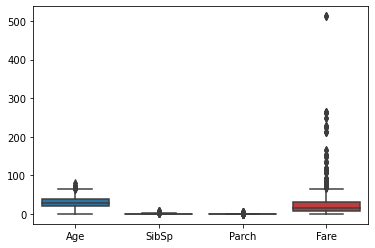

In [13]:
def is_outlier(column):
  quantiles = column.quantile([0.25,0.75])
  iqr = quantiles.diff()[0.75]
  quantiles[0.25] -= (1.5 * iqr)
  quantiles[0.75] += (1.5 * iqr)

  return sum((column < quantiles[0.25]) | (column > quantiles[0.75])) > 0

print(train[["Age", "SibSp", "Parch", "Fare"]].apply(is_outlier))

sns.boxplot(data = train[["Age", "SibSp", "Parch", "Fare"]])

No consideramos que los datos marcados como atípicos de "Age" sean irreales, puesto que una persona puede pasar la barrera de los 60/70 años, pero sin embargo no tenemos manera de chequear ni corregirlos. En esta columna utilizaremos solamente los datos que esten dentro de el rango iqr o los valores dentro de las dos desviaciones estandar.
En cuanto a "Fare" existen tres datos muy alejados de la media pero no podemos considerarlos errones puesto que, luego de una investigación concurrimos que los precios reales de los tickets eran muy dispares. 

**4.4 Limpieza de datos**

In [14]:
import numpy as np
#Declaro las mascaras de clase 1
primeraClase = trainNuevo["Pclass"] == 1
#Traigo todos los datos de los pasajeros de la tarifa de 1era clase
trainPrimerClase = trainNuevo[primeraClase]["Fare"]
#Sacamos mediana, intercuartiles y rangos de los vales
mediana1C = trainPrimerClase.median()
iqr1C = trainPrimerClase.quantile(.75) - trainPrimerClase.quantile(.25)
rango1C = [trainPrimerClase.quantile(.25), mediana1C + 1.5*iqr1C]
mascara1C = (trainPrimerClase > rango1C[0]) & (trainPrimerClase < rango1C[1])
#convierto a lista
print("\n1era clase")
trainPrimerClase_Datos = trainPrimerClase[mascara1C].tolist()
print(trainPrimerClase_Datos)

##################################
#Declaro las mascaras de clase 2
segundaClase = trainNuevo["Pclass"] == 2
#Traigo todos los datos de los pasajeros de la tarifa de 2da clase
trainSegundaClase = trainNuevo[segundaClase]["Fare"]
#Sacamos mediana, intercuartiles y rangos de los vales
mediana2C = trainSegundaClase.median()
iqr2C = trainSegundaClase.quantile(.75) - trainSegundaClase.quantile(.25)
rango2C = [trainSegundaClase.quantile(.25), mediana2C + 1.5*iqr2C]
mascara2C = (trainSegundaClase > rango2C[0]) & (trainSegundaClase < rango2C[1])
#convierto a lista
print("\n2da clase")
trainSegundaClase_Datos = trainSegundaClase[mascara2C].tolist()
print(trainSegundaClase_Datos)

##################################
#Declaro las mascaras de clase 3
terceraClase = trainNuevo["Pclass"] == 3
#Traigo todos los datos de los pasajeros de la tarifa de 2era clase
trainTerceraClase = trainNuevo[terceraClase]["Fare"]
#Sacamos mediana, intercuartiles y rangos de los vales
mediana3C = trainTerceraClase.median()
iqr3C = trainTerceraClase.quantile(.75) - trainTerceraClase.quantile(.25)
#el rango maximo es el rango minimo de 2da clase puesto que habia datos superpuestos que descartamos
rango3C = [trainTerceraClase.quantile(.25), rango2C[0]]
mascara3C = (trainTerceraClase > rango3C[0]) & (trainTerceraClase < rango3C[1])
#convierto a lista
print("\n3era clase")
trainTerceraClase_Datos = trainTerceraClase[mascara3C].tolist()
print(trainTerceraClase_Datos)


1era clase
[71.2833, 53.1, 51.8625, 35.5, 146.5208, 82.1708, 52.0, 76.7292, 61.9792, 35.5, 80.0, 83.475, 47.1, 61.175, 34.6542, 63.3583, 77.2875, 52.0, 77.2875, 53.1, 79.2, 66.6, 61.3792, 55.0, 33.5, 50.0, 146.5208, 31.0, 113.275, 76.2917, 90.0, 83.475, 90.0, 52.5542, 79.2, 86.5, 79.65, 153.4625, 135.6333, 31.0, 77.9583, 78.85, 91.0792, 151.55, 151.55, 110.8833, 108.9, 56.9292, 83.1583, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 35.5, 35.0, 55.0, 75.25, 69.3, 55.4417, 135.6333, 82.1708, 52.0, 120.0, 113.275, 90.0, 55.9, 120.0, 81.8583, 89.1042, 51.8625, 38.5, 52.0, 91.0792, 90.0, 49.5042, 78.2667, 151.55, 86.5, 108.9, 59.4, 34.0208, 93.5, 57.9792, 106.425, 49.5, 71.0, 106.425, 110.8833, 39.6, 79.65, 51.4792, 55.9, 110.8833, 40.125, 79.65, 79.2, 78.2667, 56.9292, 42.4, 153.4625, 52.5542, 32.3208, 77.9583, 69.3, 76.7292, 35.5, 113.275, 133.65, 52.0, 52.0, 76.7292, 57.0, 110.8833, 151.55, 49.5042, 52.0, 53.1, 78.85, 71.0, 53.1, 86.5, 120.0, 77.9583, 39.6, 57.0, 79.2, 120.0,

**5. ¿Qué variables considera que influyen más en la probabilidad de sobrevivir? Demuestre con gráficos.**

"Age", "Sex" , "Pclass"

Pclass  Survived
1       0            47
        1           111
2       0            84
        1            76
3       0           262
        1            78
Name: Pclass, dtype: int64


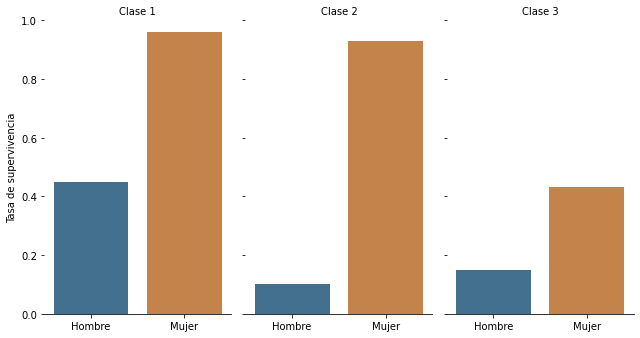

In [15]:
promedioClaseSurv = trainNuevo[mascara].groupby(["Pclass","Survived"])
print(promedioClaseSurv["Pclass"].count())

graficoPclassSurv = sns.catplot(x="Sex", y="Survived", col="Pclass", data=trainNuevo[mascara],  saturation=.5, kind="bar", ci=None, aspect=.6)
(graficoPclassSurv.set_axis_labels("", "Tasa de supervivencia").set_xticklabels(["Hombre", "Mujer"]).set_titles("Clase {col_name}").set(ylim=(0,1)).despine(left = True))

Sex     Survived
female  0            63
        1           184
male    0           330
        1            81
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='Age'>

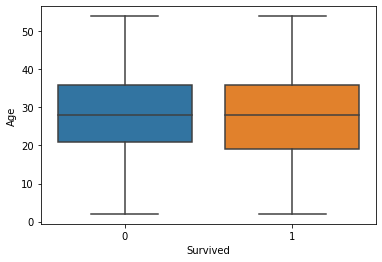

In [16]:
sexSurv = trainNuevo[mascara].groupby(["Sex","Survived"])
print(sexSurv.count()["Pclass"])
sns.boxplot(data = trainNuevo[mascara], x = "Survived", y= "Age")

Survived    0    1
Sex               
female     63  184
male      330   81


<AxesSubplot:xlabel='Survived', ylabel='Sex'>

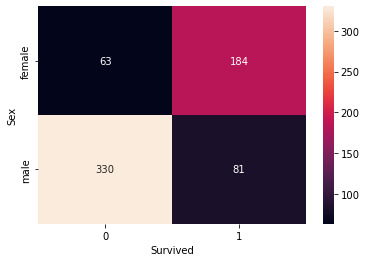

In [17]:
sexGrupo = trainNuevo[mascara].groupby(["Sex", "Survived"])
grillaCasera = sexGrupo.count()
grillaCasera_index = sexGrupo.count().reset_index()
grillaCasera_reducida = sexGrupo.count().reset_index()
pivote = sexGrupo.count().reset_index().pivot("Sex", "Survived")
print(pivote["Pclass"])
sns.heatmap(pivote["Pclass"], annot=True, fmt='g')

**6. Cree al menos una variable extra, expliquela y mencione por que considera que es adecuada, o no, para usar en el modelo.**

Agregramos una columna "Familia" que contenga los datos sumados de las columnas "SibSp" y "Parch", que como resultado arrojaría el numero de integrantes de un grupo familiar. Consideramos que no es útil para nuestro modelo puesto que tiene muy poca relación con "Survived" además no creemos que haya sido un factor prioritario a la hora de elegir quien sobrevive.

In [18]:
grupoFamiliar = train["Parch"] + train["SibSp"]
trainGrupoFamiliar = train.assign(Familia = grupoFamiliar)
print(trainGrupoFamiliar)
trainGrupoFamiliar.corr()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Familia
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Familia,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


## Separación en entrenamiento y validación

Una vez que análizamos los datos y los tenemos limpios, corresponde hacer la separación entre los datos a usar para entrenar y para validar los modelos. 

In [19]:
trainDefinitivo = trainNuevo.replace(["male", "female"], [0, 1])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    trainDefinitivo.drop(columns=["Survived"]), 
    trainDefinitivo.Survived, test_size=0.33, random_state=1
)

## Entrenamiento

Una vez separado los datos usamos los datos de entrenamiento para aprender los parámetros de nuestro modelo, en este caso usaremos una regresión logística.

In [24]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train, y_train)
y_pred_log_reg = LogReg.predict(X_test)
acc_log_reg = round( LogReg.score(X_train, y_train) * 100, 2)


**7. Investigar otro modelo e implementar para comparar.**

Modelo de regresión K-NN

In [25]:
# Al usar otro modelo, los pasos son los mismos, primero debemos importarlo de la biblioteca.
from sklearn.neighbors import KNeighborsClassifier

# Finalmente se entrena el mismo de la misma forma que entrenamos la regresión logística.
logK = KNeighborsClassifier(n_neighbors = 3)
logK.fit(X_train, y_train)
y_pred_knn  = logK.predict(X_test)
acc_knn  = round( logK.score(X_train, y_train) * 100, 2)

Modelo decisión de árbol

In [26]:
from sklearn.tree import DecisionTreeClassifier

treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, y_train)
y_pred_decision_tree = treeModel.predict(X_test)
acc_decision_tree = round(treeModel.score(X_train, y_train) * 100, 2)

# Prueba

Por último debemos probar todos los modelos que se entrenaron, para quedarnos con el de mejor desempeño. 

**8. Escoga el modelo con mejor desempeño.**

In [29]:
modelos = pd.DataFrame({
    'Modelo' : ['Regresión Logística','K-NN','Decisión de árbol'],
    'Puntaje' : [acc_log_reg, acc_knn, acc_decision_tree]
})

modelos.sort_values(by = "Puntaje", ascending = False)

,Modelo,Puntaje
2,Decisión de árbol,98.99
1,K-NN,83.39
0,Regresión Logística,79.70


Los 3 modelos dieron "puntajes" muy altos, esto quiere decir que las aproximaciones fueron muy realistas debido a la correcta limpieza de datos.
El modelo que mejor desempeño obtuvo fue la decisión de arbol y esto puede ser debido a que este es mucho más complejo. 
Podemos concluir que las columnas utilizadas ("Age","Pclass","Sex") si tenian relación a la hora de sobrevivir.
